In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

/home/arpit/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(30))
model.add(Activation('softmax'))

# parallel_model = multi_gpu_model(model, gpus=2)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [12]:
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'

nb_train_samples = 13000
# nb_validation_samples = 5000
epochs = 20
batch_size = 64

In [13]:
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=True,
        seed = 42)  # since we use binary_crossentropy loss, we need binary labels

Found 13000 images belonging to 30 classes.


In [25]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=13000 // batch_size,
        epochs=30)

Epoch 1/30
203/203 [==============================] - 174s 855ms/step - loss: 2.2503 - acc: 0.3511
Epoch 2/30
203/203 [==============================] - 174s 856ms/step - loss: 2.1263 - acc: 0.3871
Epoch 3/30
203/203 [==============================] - 174s 857ms/step - loss: 1.9913 - acc: 0.4220
Epoch 4/30
203/203 [==============================] - 174s 857ms/step - loss: 1.8699 - acc: 0.4531
Epoch 5/30
203/203 [==============================] - 174s 858ms/step - loss: 1.7825 - acc: 0.4751
Epoch 6/30
203/203 [==============================] - 174s 857ms/step - loss: 1.6656 - acc: 0.5069
Epoch 7/30
203/203 [==============================] - 174s 858ms/step - loss: 1.5675 - acc: 0.5363
Epoch 8/30
203/203 [==============================] - 174s 856ms/step - loss: 1.4775 - acc: 0.5640
Epoch 9/30
203/203 [==============================] - 174s 858ms/step - loss: 1.3876 - acc: 0.5901
Epoch 10/30
203/203 [==============================] - 174s 857ms/step - loss: 1.2812 - acc: 0.6161
Epoch 11/

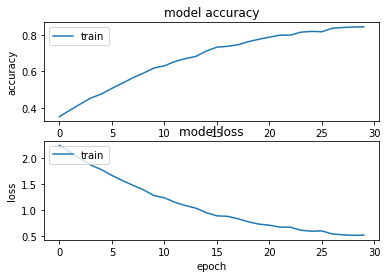

In [26]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
# plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
# plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Making the prediction for test dataset

In [27]:
test_generator = test_datagen.flow_from_directory(
    directory="data/test",
    target_size=(150, 150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 6000 images belonging to 1 classes.


In [28]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

6000/6000 [==============================] - 67s 11ms/step


In [29]:
pred[0]

array([2.0969827e-10, 3.3172444e-07, 1.8548549e-08, 1.8983506e-10,
       9.8909956e-01, 9.1493341e-12, 1.2112446e-10, 8.0359740e-08,
       3.6034622e-13, 3.0266997e-11, 3.9163725e-03, 4.6920068e-06,
       1.0658878e-07, 5.3793857e-12, 1.9019263e-08, 3.0758817e-04,
       4.2720286e-11, 5.1465241e-07, 6.6674408e-03, 3.8587935e-11,
       2.4569027e-09, 2.4130977e-13, 2.3643425e-07, 5.7925451e-08,
       2.4208971e-10, 4.1754790e-15, 3.7352070e-12, 2.8710672e-06,
       9.3550350e-09, 1.7659390e-12], dtype=float32)

In [30]:
train_generator.class_indices

{'antelope': 0,
 'bat': 1,
 'beaver': 2,
 'bobcat': 3,
 'buffalo': 4,
 'chihuahua': 5,
 'chimpanzee': 6,
 'collie': 7,
 'dalmatian': 8,
 'german+shepherd': 9,
 'grizzly+bear': 10,
 'hippopotamus': 11,
 'horse': 12,
 'killer+whale': 13,
 'mole': 14,
 'moose': 15,
 'mouse': 16,
 'otter': 17,
 'ox': 18,
 'persian+cat': 19,
 'raccoon': 20,
 'rat': 21,
 'rhinoceros': 22,
 'seal': 23,
 'siamese+cat': 24,
 'spider+monkey': 25,
 'squirrel': 26,
 'walrus': 27,
 'weasel': 28,
 'wolf': 29}

In [31]:
filenames=test_generator.filenames

In [32]:
results=pd.DataFrame({"filename":filenames})
results.to_csv("results/filenames.csv",index=False)

In [33]:
results=pd.DataFrame(pred)
results.to_csv("results/results_cnn_scratch.csv",index=False)

In [34]:
# model.save_weights('cnn_scratch_33_epochs.h5')